In [ ]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

### 1. 시간 정보가 포함된 데이터 살펴보기

In [ ]:
df = pd.read_csv('/content/complete_btc')
df.tail()

,ds,y
3031,2021-08-16,45996.3
3032,2021-08-17,44691.6
3033,2021-08-18,44723.8
3034,2021-08-19,46755.9
3035,2021-08-20,47041.6


In [ ]:
df.head()

,ds,y
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000


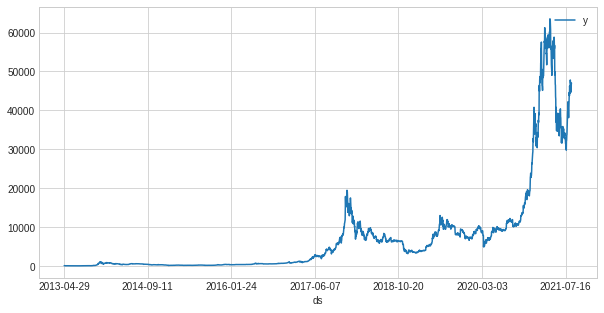

In [ ]:
df.plot(x= 'ds',  y='y', figsize=(10,5))
plt.show()

## 2. 파이썬 라이브러리를 활용한 시세 예측

### [ARIMA 모델 활용하기]

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 7.6 MB/s 
     |████████████████████████████████| 9.5 MB 17.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as SNS
%matplotlib inline

import itertools

### [Facebook Prophet 활용하기]

###  What is prophet packages? 

- 시계열 데이터들을 가지고 높은 퀄리티로 예측하는 툴이다. 

- Facebook에서 직접 개발함. 

- prophet의 데이터 칼럼들은 'ds', 'y'로 고정되어야 함.

- seasonality_mode : 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미한다. 
비트코인 데이터는 연간, 월간, 주간, 일간, 240분봉 등이 반영된다면 더 좋을 것이다. 

- changepoint_prior_scale : 트렌드가 변경되는 문맥을 반영하여 예측한다. 수치가 높을수록 overfitting에 가까워진다. 

**Fit**

In [ ]:
# pip install fbprophet import Prophet

In [ ]:
model = Prophet(seasonality_mode = 'multiplicative',
                yearly_seasonality = True,
                weekly_seasonality = True,
                daily_seasonality = True,
                changepoint_prior_scale=0.7)
model.fit(df)

**Predict**

In [ ]:
df.tail()

,ds,y
3031,2021-08-16,45996.3
3032,2021-08-17,44691.6
3033,2021-08-18,44723.8
3034,2021-08-19,46755.9
3035,2021-08-20,47041.6


In [ ]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
3396,2022-08-16,14800.515142,36675.196345,99407.262250,8439.357432,22318.275336,3.961742,3.961742,3.961742,3.418114,3.418114,3.418114,-0.011137,-0.011137,-0.011137,-0.532491,-0.532491,-0.532491,0.0,0.0,0.0,65390.362376
3397,2022-08-17,14815.841890,36437.372658,97827.206528,8420.006912,22357.887632,3.961742,3.961742,3.961742,3.364439,3.364439,3.364439,0.001200,0.001200,0.001200,-0.598503,-0.598503,-0.598503,0.0,0.0,0.0,64662.845037
3398,2022-08-18,14831.168638,36247.873669,97158.731265,8392.624228,22397.499928,3.961742,3.961742,3.961742,3.291546,3.291546,3.291546,0.003964,0.003964,0.003964,-0.674160,-0.674160,-0.674160,0.0,0.0,0.0,63648.648969
3399,2022-08-19,14846.495386,35208.338531,95311.685935,8365.241544,22437.112224,3.961742,3.961742,3.961742,3.231011,3.231011,3.231011,0.027900,0.027900,0.027900,-0.758631,-0.758631,-0.758631,0.0,0.0,0.0,62815.687130
3400,2022-08-20,14861.822135,34069.449288,92715.714442,8337.858860,22483.132432,3.961742,3.961742,3.961742,3.110265,3.110265,3.110265,-0.000551,-0.000551,-0.000551,-0.850926,-0.850926,-0.850926,0.0,0.0,0.0,61086.024882


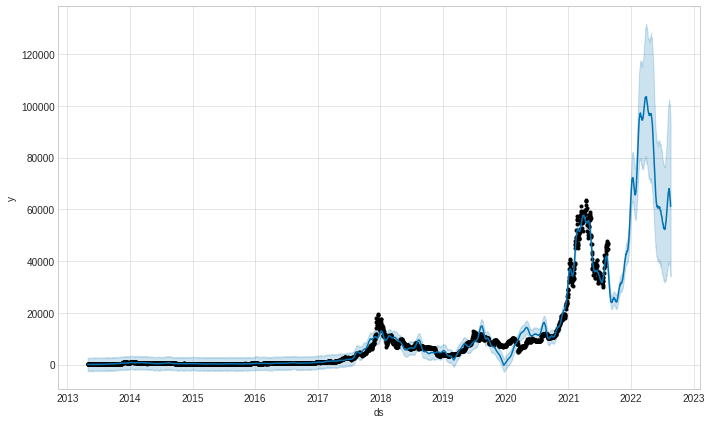

In [ ]:
fig1 = model.plot(forecast)

**Components**

- 어떤 근거들로 예측을 한 것인지에 대해 나타내주는 지표이다. 

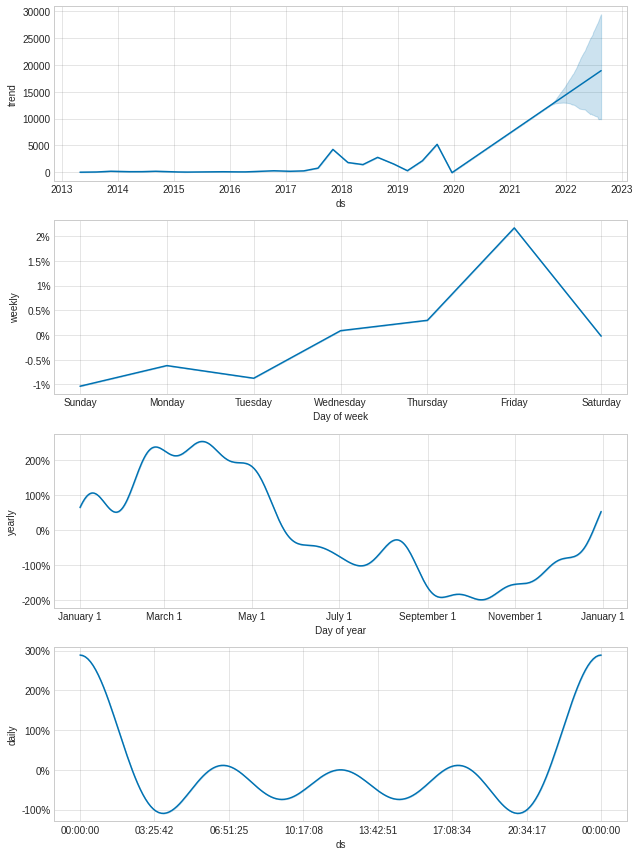

In [ ]:
fig2 = model.plot_components(forecast)

## 시세 데이터 불러오는 방법

In [ ]:
# !pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
# eth = fdr.DataReader('ETH/KRW', '2016-01-01')
# ada = fdr.DataReader('ADA/KRW', '2016-01-01')
btc = fdr.DataReader('BTC/USD', '2016-01-01')


In [ ]:
btc.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-08-16,45996.3,46991.6,48002.4,45672.1,2410.0,-0.0212
2021-08-17,44691.6,45907.5,47140.6,44441.3,84140.0,-0.0284
2021-08-18,44723.8,44691.1,46004.9,44230.0,22360.0,0.0007
2021-08-19,46755.9,44725.9,47012.3,43986.7,77920.0,0.0454
2021-08-20,47041.6,46756.7,47377.9,46646.8,5720.0,0.0061


In [ ]:
summary.tail()

,ds,y
2986,2021-07-02,33897.048590
2987,2021-07-03,34668.548402
2988,2021-07-04,35287.779766
2989,2021-07-05,33746.002456
2990,2021-07-06,34235.193451


## 2021-08-20 시세까지 합쳐서 비트코인 파일 만들기

In [ ]:
btc = btc.reset_index()
btc.head()

,Date,Close,Open,High,Low,Volume,Change
0,2016-01-01,434.0,430.0,438.0,425.9,46970.0,0.0094
1,2016-01-02,433.7,434.0,437.4,430.7,33570.0,-0.0006
2,2016-01-03,430.7,433.7,434.1,423.1,54830.0,-0.0070
3,2016-01-04,433.3,430.7,435.3,428.6,53010.0,0.0061
4,2016-01-05,431.2,433.3,435.3,428.9,45030.0,-0.0049


In [ ]:
btc = btc[['Date', 'Close']]
btc.tail() 

,Date,Close
2054,2021-08-16,45996.3
2055,2021-08-17,44691.6
2056,2021-08-18,44723.8
2057,2021-08-19,46755.9
2058,2021-08-20,47041.6


In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2059 non-null   datetime64[ns]
 1   Close   2059 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.3 KB


In [ ]:
summary.tail()

,ds,y
2986,2021-07-02,33897.048590
2987,2021-07-03,34668.548402
2988,2021-07-04,35287.779766
2989,2021-07-05,33746.002456
2990,2021-07-06,34235.193451


In [ ]:
#2021-07-06

btc.loc[btc['Date'] == '2021-07-07']


# 2014부터 뽑아내면 된다는 것을 알 수 있다. 

,Date,Close
2014,2021-07-07,33867.8


In [ ]:
add_btc = btc.loc[2014:]
add_btc.head()

,Date,Close
2014,2021-07-07,33867.8
2015,2021-07-08,32866.3
2016,2021-07-09,33797.4
2017,2021-07-10,33510.6
2018,2021-07-11,34227.7


In [ ]:
add_btc = add_btc.rename(columns = {'Date': 'ds', 'Close' : 'y'})
add_btc.head()

,ds,y
2014,2021-07-07,33867.8
2015,2021-07-08,32866.3
2016,2021-07-09,33797.4
2017,2021-07-10,33510.6
2018,2021-07-11,34227.7


In [ ]:
add_btc.tail()

,ds,y
2054,2021-08-16,45996.3
2055,2021-08-17,44691.6
2056,2021-08-18,44723.8
2057,2021-08-19,46755.9
2058,2021-08-20,47041.6


In [ ]:
complete_btc = pd.concat([summary, add_btc])
complete_btc.tail()

,ds,y
2054,2021-08-16,45996.3
2055,2021-08-17,44691.6
2056,2021-08-18,44723.8
2057,2021-08-19,46755.9
2058,2021-08-20,47041.6


In [ ]:
complete_btc.head()

,ds,y
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000


In [ ]:
len(complete_btc['ds'])

3036

In [ ]:
complete_btc = complete_btc.reset_index(drop=True)

In [ ]:
complete_btc.tail()

,ds,y
3031,2021-08-16,45996.3
3032,2021-08-17,44691.6
3033,2021-08-18,44723.8
3034,2021-08-19,46755.9
3035,2021-08-20,47041.6


In [ ]:
complete_btc.to_csv('complete_btc', index=False)